In [49]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [50]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

Download S&P 500 data

In [51]:
data=yf.download("^GSPC",start="2018-01-01",end="2024-01-01")
prices=data['Close'].squeeze()   
returns=prices.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


In [52]:
df=pd.DataFrame({
    'ret_t':returns,
    'ret_t-1':returns.shift(1),
    'ret_t-2':returns.shift(2)
}).dropna()
X=df[['ret_t-1','ret_t-2']].values
y=df['ret_t'].values

In [53]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [54]:
poly=PolynomialFeatures(degree=5,include_bias=False)
X_poly=poly.fit_transform(X_scaled)

In [55]:
lin_poly=LinearRegression()
lin_poly.fit(X_poly,y)

LinearRegression()

In [56]:
ridge_poly=Ridge(alpha=1000)
ridge_poly.fit(X_poly,y)

Ridge(alpha=1000)

In [57]:
x1=np.linspace(X_scaled[:,0].min(),X_scaled[:,0].max(),120)
x2=np.linspace(X_scaled[:,1].min(),X_scaled[:,1].max(),120)
x1_mesh,x2_mesh=np.meshgrid(x1,x2)
X_mesh=np.c_[x1_mesh.ravel(),x2_mesh.ravel()]
X_mesh_poly=poly.transform(X_mesh)

In [58]:
z_lin=lin_poly.predict(X_mesh_poly).reshape(x1_mesh.shape)
z_ridge=ridge_poly.predict(X_mesh_poly).reshape(x1_mesh.shape)

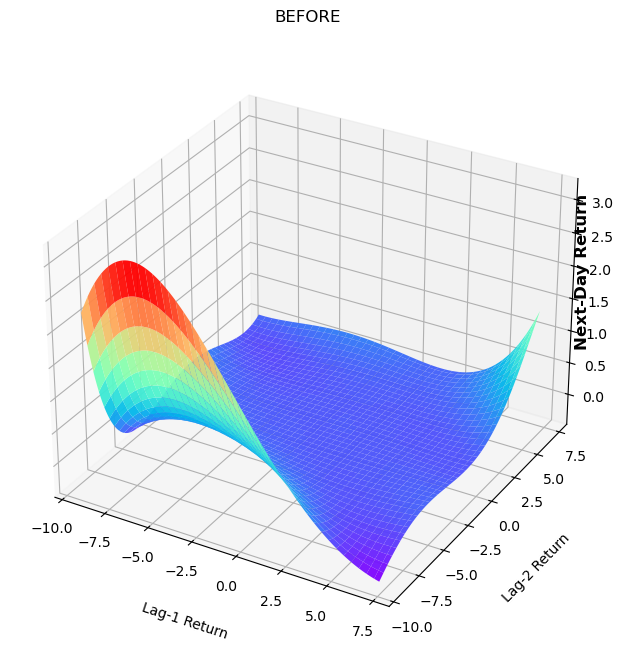

In [74]:
fig = plt.figure(figsize=(9,7))   
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(
    x1_mesh,x2_mesh,z_lin,          
    cmap='rainbow',
    linewidth=0,
    antialiased=True,
    alpha=0.95
)
ax.set_xlabel("Lag-1 Return",labelpad=15)
ax.set_ylabel("Lag-2 Return",labelpad=15)
ax.set_zlabel("Next-Day Return",labelpad=35)   
ax.view_init(elev=30,azim=-60)
plt.subplots_adjust(
    left=0.05,
    right=0.90,
    bottom=0.05,
    top=0.90
)
ax.text2D(
    0.95,0.5,
    "Next-Day Return",
    transform=ax.transAxes,
    rotation=90,
    fontsize=12,
    fontweight="bold"
)
plt.title("BEFORE", pad=20)
plt.show()

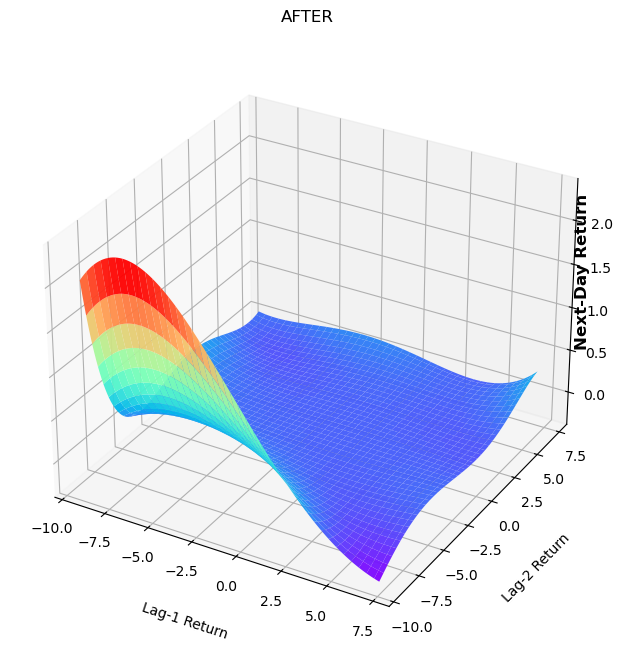

In [73]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(
    x1_mesh,x2_mesh,z_ridge,
    cmap='rainbow',
    linewidth=0,
    antialiased=True,
    alpha=0.95
)
ax.set_xlabel("Lag-1 Return",labelpad=15)
ax.set_ylabel("Lag-2 Return",labelpad=15)
ax.set_zlabel("Next-Day Return",labelpad=35)
ax.view_init(elev=30,azim=-60)
plt.subplots_adjust(
    left=0.05,
    right=0.90,
    bottom=0.05,
    top=0.90
)
ax.text2D(
    0.95, 0.5,
    "Next-Day Return",
    transform=ax.transAxes,
    rotation=90,
    fontsize=12,
    fontweight="bold"
)
plt.title("AFTER", pad=20)
plt.show()